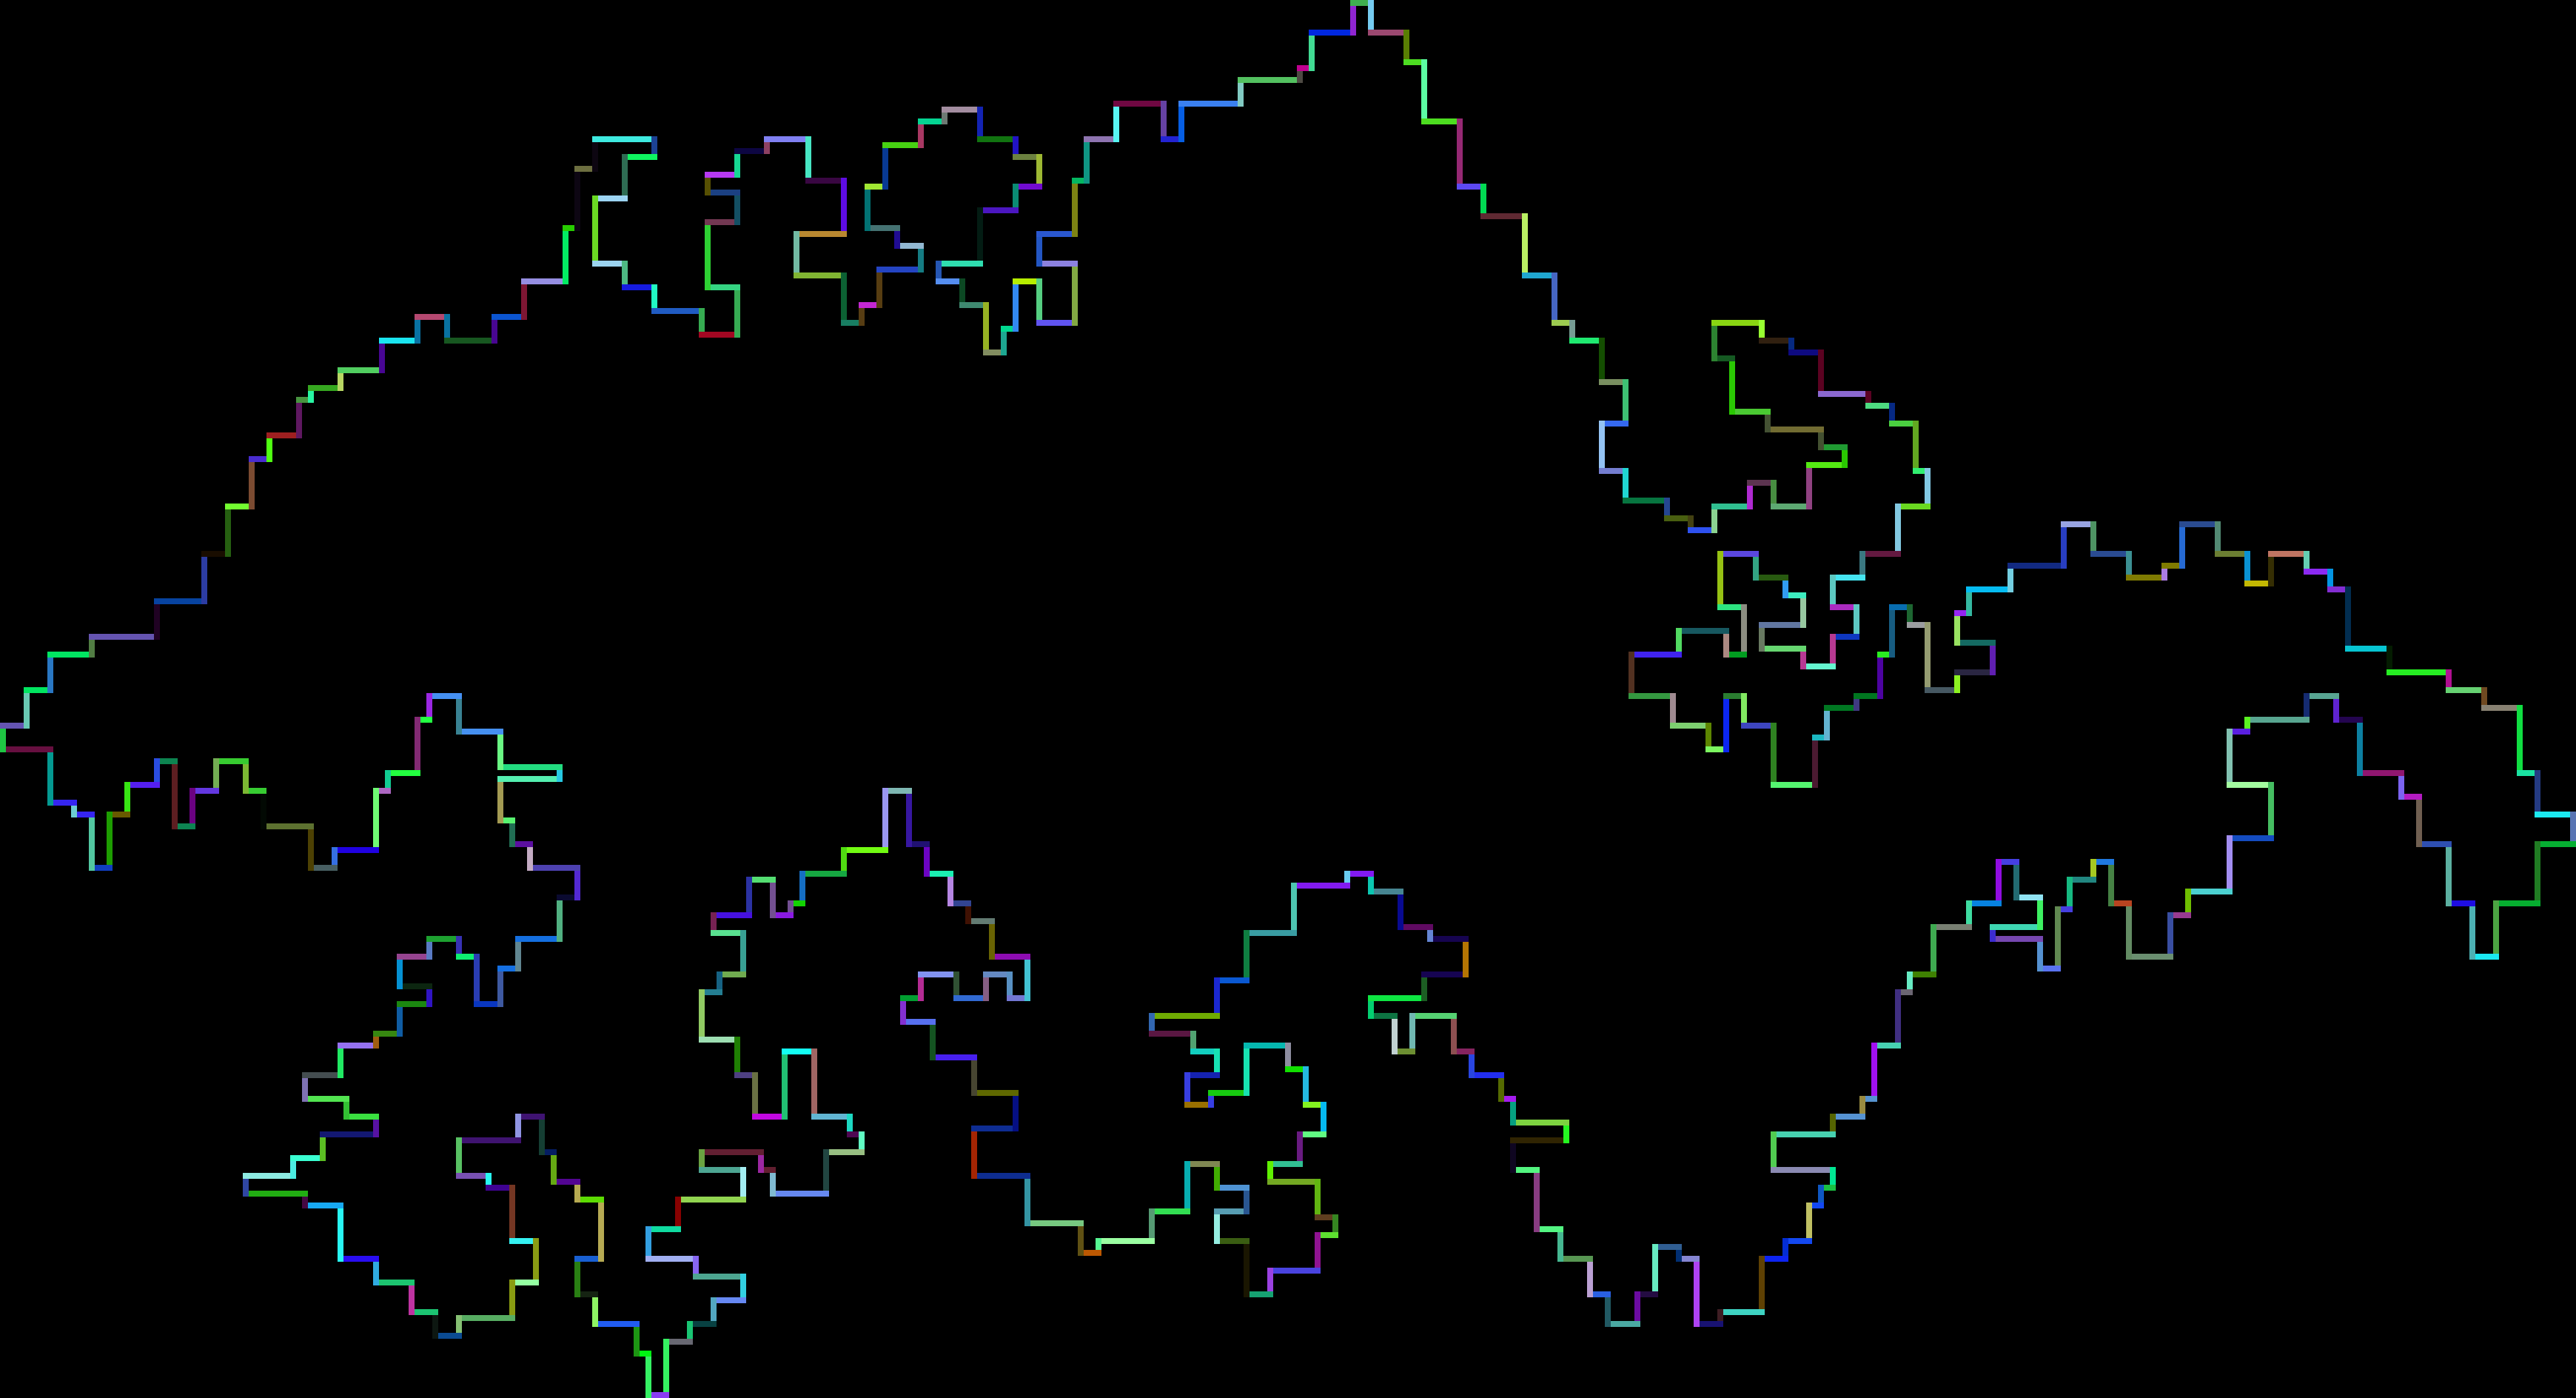

p1: 46394 46394


In [1]:
import cv2
import re
import numpy as np
from PIL import Image
from IPython import display
import time

D={
    
    'R': ( 1, 0),
    'D': ( 0, 1),
    'L': (-1, 0),
    'U': ( 0,-1)
}

def parse(fn):
    d=open(fn).read().split("\n")
    
    return d


def bounds(T):
    X=[]
    Y=[]
    for x,y in T.keys():
        X.append(x)
        Y.append(y)
    x0=min(X)
    x1=max(X)
    y0=min(Y)
    y1=max(Y)
    return x0,x1,y0,y1

def col(c):
    r=int(c[0:2],16)
    g=int(c[2:4],16)
    b=int(c[4:6],16)
    return [r,g,b]


def pretty(T,w,h):
    C=[[255,255,255],[0,0,0],[200,200,200],[0,0,255],[255,0,0],[255,0,255]]
    
    
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for x,y in T.keys():
        pix[y,x,:]=col(T[(x,y)])
    
    
    
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))






def p1(fn):
    d=parse(fn)
    
    
    T={}
    x=0
    y=0
    for _ in d:
        d,l,c=_.split(" ")
        l=int(l)
        c=c[2:-1]
        #print(d,l,c)
        dx,dy=D[d]
        for z in range(l):
            T[(x,y)]=c
            x+=dx
            y+=dy
            if (x,y) in T:
                print("closed")
    x0,x1,y0,y1=bounds(T)
    w=x1-x0+1
    h=y1-y0+1
    T2={}
    for k in T.keys():
        x,y=k
        T2[(x-x0,y-y0)]=T[k]
    T=T2
    
    pretty(T,w,h)
    S=[(int(w/2),int(h/2))]
    F={}
    while len(S):
        p=S[0]
        S=S[1:]
        if p in F:
            continue
        x,y=p
        F[p]=1
        for dx,dy in D.values():
            p2=(x+dx,y+dy)
            if not p2 in F and not p2 in T:
                S.append(p2)
            
    
    return len(set(list(F.keys())+list(T.keys())))

#46088 too low
#46278 too low
print("p1:",p1("18.txt"),46394)




In [171]:


#Are using shoelace formula
def area(P):
    l = len(P)
    A = 0
    for i in range(l):
        ax,ay = P[i%l]
        bx,by = P[(i+1)%l]
        A+= ax*by-bx*ay
    return int(0.5*A)

def edge(P):
    l = len(P)
    b = 0
    for i in range(l):
        x0,y0 = P[i]
        x1,y1 = P[(i+1)%l]
        dx = x1-x0
        dy = y1-y0
        b+=abs(dx)+abs(dy)
    return b
    

def picks(P):
    b = edge(P)
    A = area(P)
    
    #Picks theorem
    #
    # A is area
    # b is points on edge
    # i is points inside
    #
    # A=b/2+i-1
    #
    
    A = area(P)
    i = A+1-int(b/2)    
    return i+b




def p1_b(fn):
    d=parse(fn)
    drs=list(D.keys())
    
    x=0
    y=0
    P = []
    for _ in d:
        d,l,c=_.split(" ")
        l=int(l)
        c=c[2:-1]
        dx,dy = D[d]
        x+=dx*l
        y+=dy*l
        P.append((x,y))
    
    return picks(P)
                       
    

print("p1:",p1_b("18.txt"),46394)

        




p1: 46394 46394


In [174]:
def p2(fn):
    d=parse(fn)
    drs=list(D.keys())
    x,y=(0,0)
    P=[]
    for _ in d:
        d,l,c=_.split(" ")
        c=c[2:-1]
        l=int(c[:-1],16)
        d=drs[int(c[-1])]
        dx,dy=D[d]
        x+=dx*l
        y+=dy*l
        P.append((x,y))
        
        
    return picks(P)
    
print("p2:",p2("18.txt"),201398068194715)

p2: 201398068194715 1
